<a href="https://colab.research.google.com/github/yunuserbas/Projet_2_WCS/blob/main/Question_1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

**Quelles sont les catégories de produit avec les meilleures critiques ? Et les moins bonnes ?**

In [ ]:
# Importer les données.

import requests
import zipfile
import sqlite3
import pandas as pd

# Ici, nous téléchargeons le fichier de GitHub 
r = requests.get('https://github.com/murpi/olist/blob/master/olist.sqlite.zip?raw=true')
open('olist.sqlite.zip', 'wb').write(r.content)

# Puis on le décompresse
with zipfile.ZipFile("olist.sqlite.zip","r") as zip_ref:
    zip_ref.extractall()

# Nous nous connectons à la base de données
conn = sqlite3.connect('olist.sqlite')

In [ ]:
# Voici une requête spécifique pour lister le nom des tables
cursor = conn.cursor()
schema = cursor.execute("SELECT * FROM sqlite_master where type='table'").fetchall()
pd.DataFrame(schema, columns = ["type", "name", "table_name", "rootpage", "SQL"])

,type,name,table_name,rootpage,SQL
0,table,customers_dataset,customers_dataset,2,"CREATE TABLE ""customers_dataset"" (\n\t""custome..."
1,table,product_category_name_translation,product_category_name_translation,2236,"CREATE TABLE ""product_category_name_translatio..."
2,table,sellers_dataset,sellers_dataset,2237,"CREATE TABLE ""sellers_dataset"" (\n\t""seller_id..."
3,table,products_dataset,products_dataset,2282,"CREATE TABLE ""products_dataset"" (\n\t""product_..."
4,table,orders_dataset,orders_dataset,2859,"CREATE TABLE ""orders_dataset"" (\n\t""order_id""\..."
5,table,order_reviews_dataset,order_reviews_dataset,7391,"CREATE TABLE ""order_reviews_dataset"" (\n\t""rev..."
6,table,order_payments_dataset,order_payments_dataset,11053,"CREATE TABLE ""order_payments_dataset"" (\n\t""or..."
7,table,order_items_dataset,order_items_dataset,12645,"CREATE TABLE ""order_items_dataset"" (\n\t""order..."
8,table,geolocation_dataset,geolocation_dataset,16680,"CREATE TABLE ""geolocation_dataset"" (\n\t""geolo..."


In [ ]:
order_reviews_dataset_sql = pd.read_sql("select * from order_reviews_dataset ", conn)
order_items_dataset_sql = pd.read_sql("select * from order_items_dataset	", conn)
products_dataset_sql = pd.read_sql("select * from products_dataset	", conn)


product_items = pd.merge(products_dataset_sql, order_items_dataset_sql)


df_product_review_items = pd.merge(product_items, order_reviews_dataset_sql)
 
df_product_review_items

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,19866247db89845ef558ef19a6c26fcd,5,None,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17 00:00:00,2018-02-18 23:24:14
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,32921b4e09c9a19d61fe46ce04231b84,5,None,None,2018-07-14 00:00:00,2018-07-16 16:20:04
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,70949d129965fb1ee32aaccec720a19e,1,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07 00:00:00,2018-08-08 11:53:04
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,74c9c7d0bc153bbbc92e4c1597b8ba55,5,None,None,2018-04-17 00:00:00,2018-04-18 04:29:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,...,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,80fcb348e6d016ef48890cdd1c499a15,4,None,Bom,2018-01-16 00:00:00,2018-01-18 23:07:20
112368,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,...,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,affd1479c0f636f254eaba61fcb93588,5,None,None,2018-03-24 00:00:00,2018-03-26 23:42:46
112369,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,...,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,affd1479c0f636f254eaba61fcb93588,5,None,None,2018-03-24 00:00:00,2018-03-26 23:42:46
112370,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,...,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,affd1479c0f636f254eaba61fcb93588,5,None,None,2018-03-24 00:00:00,2018-03-26 23:42:46


In [ ]:
pd_dataframe = pd.DataFrame(df_product_review_items.groupby('product_category_name')['review_score'].mean()) 

round(pd_dataframe[['review_score']], 2).sort_values(by = 'review_score', ascending = False).head(10)

,review_score
product_category_name,
cds_dvds_musicais,4.64
fashion_roupa_infanto_juvenil,4.50
livros_interesse_geral,4.45
construcao_ferramentas_ferramentas,4.44
flores,4.42
livros_importados,4.40
livros_tecnicos,4.37
alimentos_bebidas,4.32
malas_acessorios,4.32


In [ ]:
# afficher les lignes avec les meilleurs note de 3 a 5

pd_review_score_plus3 = df_product_review_items.loc[df_product_review_items['review_score'] >3]

In [ ]:
# grouper par categorie et moyenne

pd_review_score_plus3_mean = pd.DataFrame(pd_review_score_plus3.groupby('product_category_name')['review_score'].mean()) 

# afficher dans lordre croissant pour avoir la plus petite note

round(pd_review_score_plus3_mean.sort_values(by = 'review_score', ascending = False), 2)

,review_score
product_category_name,
fashion_roupa_infanto_juvenil,5.00
livros_importados,4.90
la_cuisine,4.90
cine_foto,4.89
artes_e_artesanato,4.83
...,...
agro_industria_e_comercio,4.65
moveis_escritorio,4.62
fashion_roupa_feminina,4.59


In [ ]:
# afficher les lignes avec les meilleurs note de 3 a 1

pd_review_score_less3 = df_product_review_items.loc[df_product_review_items['review_score'] <= 3]

# grouper par categorie et moyenne

pd_review_score_less3_mean = pd.DataFrame(pd_review_score_less3.groupby('product_category_name')['review_score'].mean()) 

# afficher dans lordre décroissant pour avoir la plus petite note

round(pd_review_score_less3_mean.sort_values(by = 'review_score', ascending = True), 2)

,review_score
product_category_name,
pc_gamer,1.00
seguros_e_servicos,1.00
la_cuisine,1.00
fashion_roupa_infanto_juvenil,1.00
construcao_ferramentas_ferramentas,1.22
...,...
fashion_roupa_feminina,2.06
construcao_ferramentas_iluminacao,2.07
sinalizacao_e_seguranca,2.17


# Question 2 et 3

**Y a-t-il une corrélation entre les dimensions (taille, poids) et le score de la critique ?**

**Y a-t-il une corrélation entre le descriptif (longueur, nombre de photos) et le score de la critique ?**

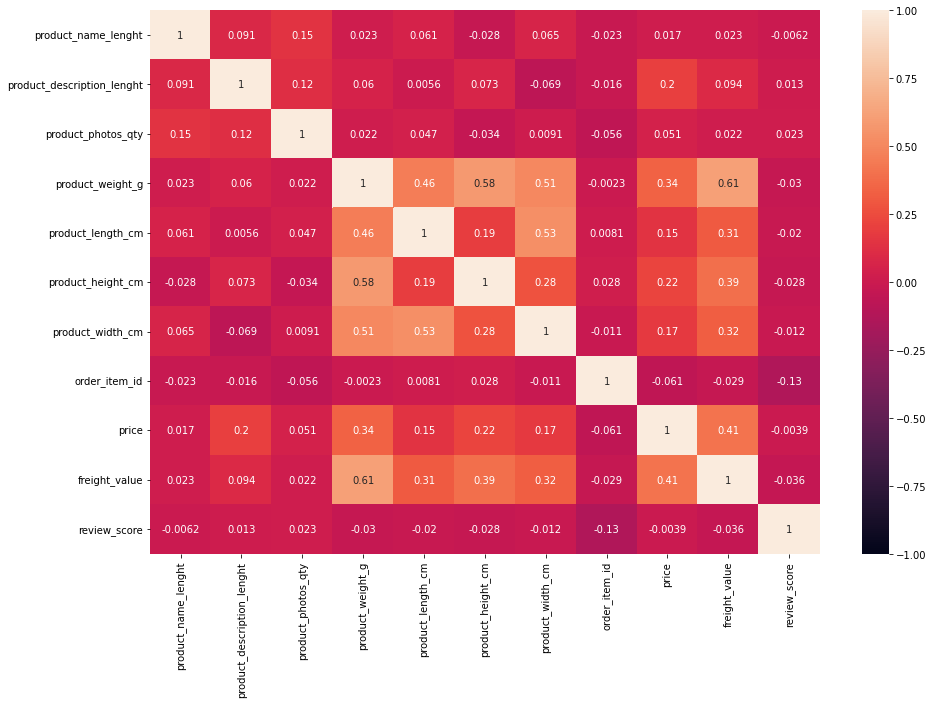

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Correlation heatmap


plt.figure(figsize=(15,10))
sns.heatmap(df_product_review_items.corr(), annot=True, vmin= -1, vmax= 1)